In [1]:
import pandas as pd
import psycopg2
from config import *
import seaborn as sn
import matplotlib.pyplot as plt
import re

In [2]:
conn = psycopg2.connect(
   database=DATABASE, user=USER, password=PASSWORD, host=HOST, port= PORT
)

In [3]:
cursor = conn.cursor()

In [4]:
cursor.execute("Select * FROM races LIMIT 0")
colnames = [desc[0] for desc in cursor.description]
colnames

['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url']

In [5]:
cursor.execute("SELECT * FROM races")
data = cursor.fetchall()
race_df = pd.DataFrame(data, columns=colnames)
race_df.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [6]:
cursor.execute("Select * FROM results LIMIT 0")
colnames = [desc[0] for desc in cursor.description]
colnames

['resultId',
 'raceId',
 'driverId',
 'constructorId',
 'number',
 'grid',
 'position',
 'positionText',
 'positionOrder',
 'points',
 'laps',
 'time',
 'milliseconds',
 'fastestLap',
 'rank',
 'fastestLapTime',
 'fastestLapSpeed',
 'statusId']

In [79]:
# cursor.execute("SELECT * FROM results")
# data = cursor.fetchall()
# results_df = pd.DataFrame(data, columns=colnames)
# results_df.head()
filepath = "../Resources/Dataset/results_weather.csv"
results_df = pd.read_csv(filepath)
results_df.head()

,raceId,resultId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLapTime,fastestLapSpeed,statusId,year,round,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy
0,18,1,1,1,22,1,1,1,1,10.0,...,1:27.452,218.300,1,2008,1,1,0,0,0,0
1,18,2,2,2,3,5,2,2,2,8.0,...,1:27.739,217.586,1,2008,1,1,0,0,0,0
2,18,3,3,3,7,7,3,3,3,6.0,...,1:28.090,216.719,1,2008,1,1,0,0,0,0
3,18,4,4,4,5,11,4,4,4,5.0,...,1:28.603,215.464,1,2008,1,1,0,0,0,0
4,18,5,5,1,23,3,5,5,5,4.0,...,1:27.418,218.385,1,2008,1,1,0,0,0,0


In [80]:
filepath = "../Resources/Dataset/status_updated.csv"
status_df = pd.read_csv(filepath)
status_df.head()

,statusId,status,Description
0,1,Finished,Finished
1,2,Disqualified,DQed
2,3,Accident,Accident
3,4,Collision,Accident
4,5,Engine,Engine


In [81]:
raceresults_df = results_df.merge(race_df,left_on='raceId',right_on='raceId',how='left')
raceresults_df = raceresults_df.dropna().reset_index()
raceresults_df

,index,raceId,resultId,driverId,constructorId,number,grid,position,positionText,positionOrder,...,weather_dry,weather_wet,weather_cloudy,year_y,round_y,circuitId,name,date,time_y,url
0,0,18,1,1,1,22,1,1,1,1,...,0,0,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
1,1,18,2,2,2,3,5,2,2,2,...,0,0,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
2,2,18,3,3,3,7,7,3,3,3,...,0,0,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
3,3,18,4,4,4,5,11,4,4,4,...,0,0,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
4,4,18,5,5,1,23,3,5,5,5,...,0,0,0,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25035,25035,1055,25041,849,3,6,19,16,16,16,...,0,0,1,2021,4,4,Spanish Grand Prix,2021-05-09,13:00:00,http://en.wikipedia.org/wiki/2021_Spanish_Gran...
25036,25036,1055,25042,4,214,14,10,17,17,17,...,0,0,1,2021,4,4,Spanish Grand Prix,2021-05-09,13:00:00,http://en.wikipedia.org/wiki/2021_Spanish_Gran...
25037,25037,1055,25043,854,210,47,18,18,18,18,...,0,0,1,2021,4,4,Spanish Grand Prix,2021-05-09,13:00:00,http://en.wikipedia.org/wiki/2021_Spanish_Gran...
25038,25038,1055,25044,853,210,9,20,19,19,19,...,0,0,1,2021,4,4,Spanish Grand Prix,2021-05-09,13:00:00,http://en.wikipedia.org/wiki/2021_Spanish_Gran...


In [83]:
raceresults_df.drop(columns=['url','time_y','date','round_x','round_y','positionText','position','number','points','laps','time_x','milliseconds','fastestLap','rank'],inplace=True)
raceresults_df = raceresults_df.merge(status_df,left_on='statusId',right_on='statusId',how='left')
raceresults_df = raceresults_df.reset_index().drop(columns=['level_0','index'])
raceresults_df

,raceId,resultId,driverId,constructorId,grid,positionOrder,fastestLapTime,fastestLapSpeed,statusId,year_x,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,year_y,circuitId,name,status,Description
0,18,1,1,1,1,1,1:27.452,218.300,1,2008,1,0,0,0,0,2008,1,Australian Grand Prix,Finished,Finished
1,18,2,2,2,5,2,1:27.739,217.586,1,2008,1,0,0,0,0,2008,1,Australian Grand Prix,Finished,Finished
2,18,3,3,3,7,3,1:28.090,216.719,1,2008,1,0,0,0,0,2008,1,Australian Grand Prix,Finished,Finished
3,18,4,4,4,11,4,1:28.603,215.464,1,2008,1,0,0,0,0,2008,1,Australian Grand Prix,Finished,Finished
4,18,5,5,1,3,5,1:27.418,218.385,1,2008,1,0,0,0,0,2008,1,Australian Grand Prix,Finished,Finished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25035,1055,25041,849,3,19,16,1:22.905,203.003,11,2021,0,0,0,0,1,2021,4,Spanish Grand Prix,+1 Lap,Lapped
25036,1055,25042,4,214,10,17,1:21.182,207.311,11,2021,0,0,0,0,1,2021,4,Spanish Grand Prix,+1 Lap,Lapped
25037,1055,25043,854,210,18,18,1:22.637,203.661,12,2021,0,0,0,0,1,2021,4,Spanish Grand Prix,+2 Laps,Lapped
25038,1055,25044,853,210,20,19,1:24.040,200.261,12,2021,0,0,0,0,1,2021,4,Spanish Grand Prix,+2 Laps,Lapped


In [90]:
fastest_df = raceresults_df[raceresults_df['fastestLapTime']!="\\N"]
fastest_df

,raceId,resultId,driverId,constructorId,grid,positionOrder,fastestLapTime,fastestLapSpeed,statusId,year_x,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,year_y,circuitId,name,status,Description
0,18,1,1,1,1,1,1:27.452,218.300,1,2008,1,0,0,0,0,2008,1,Australian Grand Prix,Finished,Finished
1,18,2,2,2,5,2,1:27.739,217.586,1,2008,1,0,0,0,0,2008,1,Australian Grand Prix,Finished,Finished
2,18,3,3,3,7,3,1:28.090,216.719,1,2008,1,0,0,0,0,2008,1,Australian Grand Prix,Finished,Finished
3,18,4,4,4,11,4,1:28.603,215.464,1,2008,1,0,0,0,0,2008,1,Australian Grand Prix,Finished,Finished
4,18,5,5,1,3,5,1:27.418,218.385,1,2008,1,0,0,0,0,2008,1,Australian Grand Prix,Finished,Finished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25035,1055,25041,849,3,19,16,1:22.905,203.003,11,2021,0,0,0,0,1,2021,4,Spanish Grand Prix,+1 Lap,Lapped
25036,1055,25042,4,214,10,17,1:21.182,207.311,11,2021,0,0,0,0,1,2021,4,Spanish Grand Prix,+1 Lap,Lapped
25037,1055,25043,854,210,18,18,1:22.637,203.661,12,2021,0,0,0,0,1,2021,4,Spanish Grand Prix,+2 Laps,Lapped
25038,1055,25044,853,210,20,19,1:24.040,200.261,12,2021,0,0,0,0,1,2021,4,Spanish Grand Prix,+2 Laps,Lapped


In [91]:
raceresults_df = raceresults_df[raceresults_df['year_y']>=2000]
raceresults_df

,raceId,resultId,driverId,constructorId,grid,positionOrder,fastestLapTime,fastestLapSpeed,statusId,year_x,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,year_y,circuitId,name,status,Description
0,18,1,1,1,1,1,1:27.452,218.300,1,2008,1,0,0,0,0,2008,1,Australian Grand Prix,Finished,Finished
1,18,2,2,2,5,2,1:27.739,217.586,1,2008,1,0,0,0,0,2008,1,Australian Grand Prix,Finished,Finished
2,18,3,3,3,7,3,1:28.090,216.719,1,2008,1,0,0,0,0,2008,1,Australian Grand Prix,Finished,Finished
3,18,4,4,4,11,4,1:28.603,215.464,1,2008,1,0,0,0,0,2008,1,Australian Grand Prix,Finished,Finished
4,18,5,5,1,3,5,1:27.418,218.385,1,2008,1,0,0,0,0,2008,1,Australian Grand Prix,Finished,Finished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25035,1055,25041,849,3,19,16,1:22.905,203.003,11,2021,0,0,0,0,1,2021,4,Spanish Grand Prix,+1 Lap,Lapped
25036,1055,25042,4,214,10,17,1:21.182,207.311,11,2021,0,0,0,0,1,2021,4,Spanish Grand Prix,+1 Lap,Lapped
25037,1055,25043,854,210,18,18,1:22.637,203.661,12,2021,0,0,0,0,1,2021,4,Spanish Grand Prix,+2 Laps,Lapped
25038,1055,25044,853,210,20,19,1:24.040,200.261,12,2021,0,0,0,0,1,2021,4,Spanish Grand Prix,+2 Laps,Lapped


In [92]:
fastest_df['fastestLapSpeed']=fastest_df['fastestLapSpeed'].astype(float)
fastest_df.reset_index(inplace=True)
fastest_df.head()

C:\Users\ramad\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,index,raceId,resultId,driverId,constructorId,grid,positionOrder,fastestLapTime,fastestLapSpeed,statusId,...,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,year_y,circuitId,name,status,Description
0,0,18,1,1,1,1,1,1:27.452,218.300,1,...,1,0,0,0,0,2008,1,Australian Grand Prix,Finished,Finished
1,1,18,2,2,2,5,2,1:27.739,217.586,1,...,1,0,0,0,0,2008,1,Australian Grand Prix,Finished,Finished
2,2,18,3,3,3,7,3,1:28.090,216.719,1,...,1,0,0,0,0,2008,1,Australian Grand Prix,Finished,Finished
3,3,18,4,4,4,11,4,1:28.603,215.464,1,...,1,0,0,0,0,2008,1,Australian Grand Prix,Finished,Finished
4,4,18,5,5,1,3,5,1:27.418,218.385,1,...,1,0,0,0,0,2008,1,Australian Grand Prix,Finished,Finished


In [93]:
fastest_df = fastest_df.drop(columns=['index','statusId','name','status','year_y'])
fastest_df

,raceId,resultId,driverId,constructorId,grid,positionOrder,fastestLapTime,fastestLapSpeed,year_x,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,circuitId,Description
0,18,1,1,1,1,1,1:27.452,218.300,2008,1,0,0,0,0,1,Finished
1,18,2,2,2,5,2,1:27.739,217.586,2008,1,0,0,0,0,1,Finished
2,18,3,3,3,7,3,1:28.090,216.719,2008,1,0,0,0,0,1,Finished
3,18,4,4,4,11,4,1:28.603,215.464,2008,1,0,0,0,0,1,Finished
4,18,5,5,1,3,5,1:27.418,218.385,2008,1,0,0,0,0,1,Finished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6622,1055,25041,849,3,19,16,1:22.905,203.003,2021,0,0,0,0,1,4,Lapped
6623,1055,25042,4,214,10,17,1:21.182,207.311,2021,0,0,0,0,1,4,Lapped
6624,1055,25043,854,210,18,18,1:22.637,203.661,2021,0,0,0,0,1,4,Lapped
6625,1055,25044,853,210,20,19,1:24.040,200.261,2021,0,0,0,0,1,4,Lapped


In [94]:
regex1 = re.compile('([0-9]*)(\:)')
regex2 = re.compile('(\:)([0-9]*.[0-9]*)')
minute = []
seconds = []
for x in range(len(fastest_df['fastestLapTime'])):
    minute.append(float(regex1.search(fastest_df['fastestLapTime'][x]).group(1))*60+float(regex2.search(fastest_df['fastestLapTime'][x]).group(2)))

fastest_df['fastestLapMilli'] = minute
fastest_df
    

,raceId,resultId,driverId,constructorId,grid,positionOrder,fastestLapTime,fastestLapSpeed,year_x,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,circuitId,Description,fastestLapMilli
0,18,1,1,1,1,1,1:27.452,218.300,2008,1,0,0,0,0,1,Finished,87.452
1,18,2,2,2,5,2,1:27.739,217.586,2008,1,0,0,0,0,1,Finished,87.739
2,18,3,3,3,7,3,1:28.090,216.719,2008,1,0,0,0,0,1,Finished,88.090
3,18,4,4,4,11,4,1:28.603,215.464,2008,1,0,0,0,0,1,Finished,88.603
4,18,5,5,1,3,5,1:27.418,218.385,2008,1,0,0,0,0,1,Finished,87.418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6622,1055,25041,849,3,19,16,1:22.905,203.003,2021,0,0,0,0,1,4,Lapped,82.905
6623,1055,25042,4,214,10,17,1:21.182,207.311,2021,0,0,0,0,1,4,Lapped,81.182
6624,1055,25043,854,210,18,18,1:22.637,203.661,2021,0,0,0,0,1,4,Lapped,82.637
6625,1055,25044,853,210,20,19,1:24.040,200.261,2021,0,0,0,0,1,4,Lapped,84.040


In [95]:
corrMatrix = fastest_df.drop(columns=['resultId','raceId']).corr()
corrMatrix

,driverId,constructorId,grid,positionOrder,fastestLapSpeed,year_x,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,circuitId,fastestLapMilli
driverId,1.000000,0.137077,0.187853,0.161055,-0.017916,0.621415,-0.104769,-0.043490,-0.113478,-0.053442,0.084044,0.202589,0.064121
constructorId,0.137077,1.000000,0.219106,0.186990,-0.073126,0.270613,-0.038489,-0.029020,-0.040048,-0.001603,0.022011,0.083908,0.096415
grid,0.187853,0.219106,1.000000,0.613751,-0.124693,-0.034789,0.012746,0.002741,0.013348,0.011295,-0.018547,-0.019530,0.107720
positionOrder,0.161055,0.186990,0.613751,1.000000,-0.174998,-0.020612,0.010156,-0.001577,0.017459,0.014638,-0.021200,-0.011931,0.146898
fastestLapSpeed,-0.017916,-0.073126,-0.124693,-0.174998,1.000000,0.010508,0.067554,-0.065098,0.025595,-0.121640,0.178820,0.079435,-0.199763
year_x,0.621415,0.270613,-0.034789,-0.020612,0.010508,1.000000,-0.153463,-0.070842,-0.185374,-0.063672,0.132442,0.307797,0.070977
weather_warm,-0.104769,-0.038489,0.012746,0.010156,0.067554,-0.153463,1.000000,-0.042301,-0.117350,-0.253956,-0.228304,0.014412,-0.102120
weather_cold,-0.043490,-0.029020,0.002741,-0.001577,-0.065098,-0.070842,-0.042301,1.000000,-0.022934,0.154014,-0.022521,-0.019322,-0.009588
weather_dry,-0.113478,-0.040048,0.013348,0.017459,0.025595,-0.185374,-0.117350,-0.022934,1.000000,0.041547,0.019662,-0.074484,0.089165
weather_wet,-0.053442,-0.001603,0.011295,0.014638,-0.121640,-0.063672,-0.253956,0.154014,0.041547,1.000000,-0.003570,-0.100658,0.107863


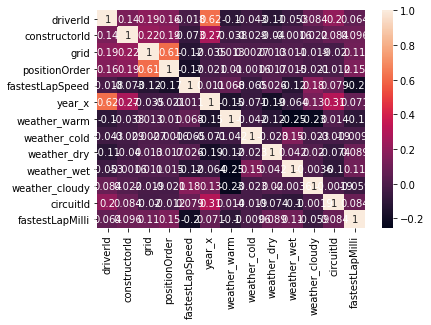

In [96]:
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [97]:
filepath2 = "../Resources/Dataset/constructors.csv"
filepath3 = "../Resources/Dataset/circuits.csv"
filepath4 = "../Resources/Dataset/drivers.csv"
cons_df = pd.read_csv(filepath2)
drivers_df = pd.read_csv(filepath4)
circuits_df = pd.read_csv(filepath3)
cons_df.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [174]:
smallfastest_df = fastest_df[(fastest_df['fastestLapMilli']<=140) & (fastest_df['year_x']>=2010)]
smallfastest_df = smallfastest_df.merge(cons_df, left_on="constructorId",right_on="constructorId",how="left")
smallfastest_df = smallfastest_df.drop(columns=['constructorRef','nationality','url'])
smallfastest_df = smallfastest_df.merge(drivers_df, left_on="driverId",right_on="driverId",how="left")
smallfastest_df = smallfastest_df.drop(columns=['nationality','url','dob','surname','forename','code','number'])
smallfastest_df = smallfastest_df.merge(circuits_df, left_on="circuitId",right_on="circuitId",how="left")
smallfastest_df = smallfastest_df.drop(columns=['url','lat','lng','country','alt','name_y'])

smallfastest_df
# smallfastest_df.boxplot(column=['fastestLapMilli'],by=['constructorId'],figsize=(15,10))

,raceId,resultId,driverId,constructorId,grid,positionOrder,fastestLapTime,fastestLapSpeed,year_x,weather_warm,...,weather_dry,weather_wet,weather_cloudy,circuitId,Description,fastestLapMilli,name_x,driverRef,circuitRef,location
0,337,20323,4,6,3,1,1:58.287,191.706,2010,1,...,0,0,0,3,Finished,118.287,Ferrari,alonso,bahrain,Sakhir
1,337,20324,13,6,2,2,1:59.732,189.392,2010,1,...,0,0,0,3,Finished,119.732,Ferrari,massa,bahrain,Sakhir
2,337,20325,1,1,4,3,1:59.560,189.665,2010,1,...,0,0,0,3,Finished,119.560,McLaren,hamilton,bahrain,Sakhir
3,337,20326,20,9,1,4,2:00.218,188.627,2010,1,...,0,0,0,3,Finished,120.218,Red Bull,vettel,bahrain,Sakhir
4,337,20327,3,131,5,5,2:00.236,188.599,2010,1,...,0,0,0,3,Finished,120.236,Mercedes,rosberg,bahrain,Sakhir
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4514,1055,25041,849,3,19,16,1:22.905,203.003,2021,0,...,0,0,1,4,Lapped,82.905,Williams,latifi,catalunya,Montmeló
4515,1055,25042,4,214,10,17,1:21.182,207.311,2021,0,...,0,0,1,4,Lapped,81.182,Alpine F1 Team,alonso,catalunya,Montmeló
4516,1055,25043,854,210,18,18,1:22.637,203.661,2021,0,...,0,0,1,4,Lapped,82.637,Haas F1 Team,mick_schumacher,catalunya,Montmeló
4517,1055,25044,853,210,20,19,1:24.040,200.261,2021,0,...,0,0,1,4,Lapped,84.040,Haas F1 Team,mazepin,catalunya,Montmeló


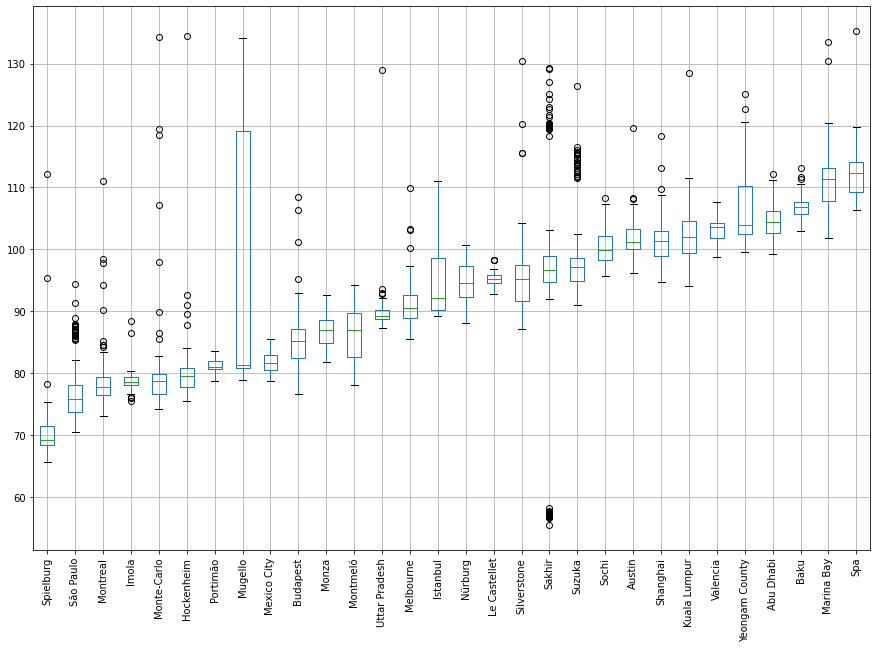

In [173]:
def boxplot_sorted(df, by, column):
  df = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
  meds = df.median().sort_values()
  df[meds.index].boxplot(rot=90,figsize=(15,10))

boxplot_sorted(smallfastest_df, by=["location"], column="fastestLapMilli")

In [110]:
fastest_df['Description'].value_counts()

Finished          3245
Lapped            2183
Accident           367
Engine             200
Control System     146
Transmission       146
Wheel Assembly     136
Chassis             75
Other               71
Mechanical          35
DQed                21
Driver Safety        2
Name: Description, dtype: int64

In [138]:
smallfastest_df.groupby(['location','Description']).agg({'resultId':'count'}).reset_index().to_csv("testest.csv")

<AxesSubplot:xlabel='location'>

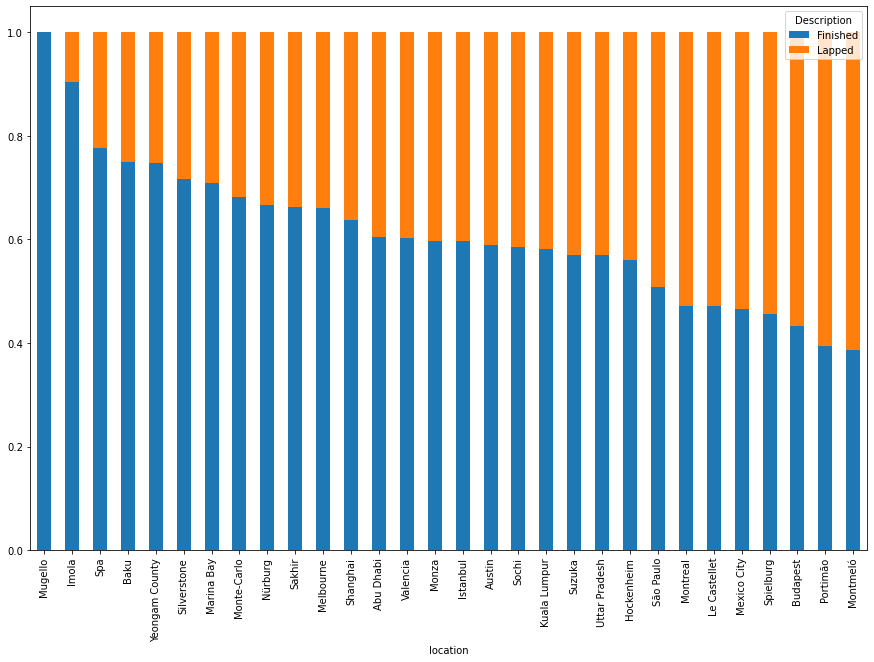

In [172]:
(smallfastest_df[(smallfastest_df['Description']=='Finished') | (smallfastest_df['Description']=='Lapped')]
 .groupby('location')['Description'].value_counts(normalize=True)
 .unstack('Description')
 .sort_values(by='Finished', ascending=False)
 .plot.bar(stacked=True,figsize=(15,10)))

<AxesSubplot:xlabel='location'>

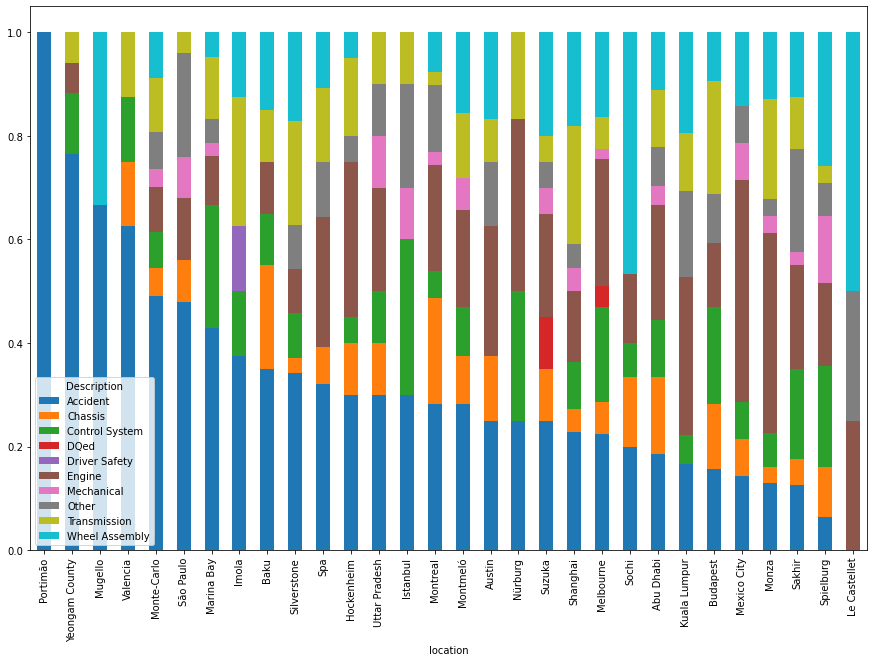

In [169]:
(smallfastest_df[(smallfastest_df['Description']!='Finished') & (smallfastest_df['Description']!='Lapped')]
 .groupby('location')['Description'].value_counts(normalize=True)
 .unstack('Description')
 .sort_values(by='Accident', ascending=False)
 .plot.bar(stacked=True,figsize=(15,10)))

In [159]:
df1 = (smallfastest_df.groupby(['location','Description'])['Description'].size()
        .unstack('Description', fill_value=0)
        .sort_values(by='Engine', ascending=False))

print (df1)

Description     Accident  Chassis  Control System  DQed  Driver Safety  \
location                                                                 
Monza                  4        1               2     0              0   
Melbourne             11        3               9     2              0   
Kuala Lumpur           6        0               2     0              0   
Sakhir                 5        2               7     0              0   
Montreal              11        8               2     0              0   
Spa                    9        2               0     0              0   
Austin                 6        3               0     0              0   
Montmeló               9        3               3     0              0   
Mexico City            2        1               1     0              0   
Abu Dhabi              5        4               3     0              0   
Hockenheim             6        2               1     0              0   
Monte-Carlo           28        3     